# Training and Deploying TensorFlow Models

In [1]:
pip install mlflow

  Created wheel for databricks-cli: filename=databricks_cli-0.16.6-py3-none-any.whl size=112634 sha256=ed740c7fe98741a9abd490bcc18fc0f842ba27da8c7ef0500216acb80cfc5ba5
  Stored in directory: c:\users\damin\appdata\local\pip\cache\wheels\76\3a\2f\8a3d92bc72a413217b5c8649e2044d7161cacbe06e014361a3
Successfully built databricks-cli
Note: you may need to restart the kernel to use updated packages.


### Download MLflow repo

```
(base) C:\Users\damin>git clone https://github.com/mlflow/mlflow
Cloning into 'mlflow'...
remote: Enumerating objects: 50446, done.
remote: Total 50446 (delta 0), reused 0 (delta 0), pack-reused 50446
Receiving objects: 100% (50446/50446), 68.96 MiB | 5.59 MiB/s, done.
Resolving deltas: 100% (38688/38688), done.
```

### MLflow with TensorFlow

* In this example, we use TensorFlow's [premade estimator iris data example](https://www.tensorflow.org/tutorials/estimator/premade) and add MLflow tracking.
* This example trains a `tf.estimator.DNNClassifier` on the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) and predicts on a validation set.
* The code is mostly pure TensorFlow - we add a call to `mlflow.tensorflow.autolog()` before training to record params & metrics from model training (e.g. model loss) as part of an MLflow run. 
* After training, `mlflow.tensorflow.autolog()` links the model with the same MLflow run when `export_saved_model()` is called, allowing us to associate the model with its training metrics & params. 
* We then demonstrate how to load the saved model back as a generic `mlflow.pyfunc`, allowing us to make predictions on pandas DataFrames.

### Train the model using default hyperparameters

```
(base) C:\Users\damin\mlflow>python examples\tensorflow\tf2\train_predict_2.py


2022-04-22 14:50:04.221637: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-22 14:50:04.221903: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Downloading data from http://download.tensorflow.org/data/iris_training.csv
16384/2194 [] - 0s 0s/step
Downloading data from http://download.tensorflow.org/data/iris_test.csv
16384/573 ] - 0s 0s/step
2022-04-22 14:50:08.831309: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-22 14:50:08.831919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-04-22 14:50:08.832625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-04-22 14:50:08.833220: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cufft64_10.dll'; dlerror: cufft64_10.dll not found
2022-04-22 14:50:08.833793: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'curand64_10.dll'; dlerror: curand64_10.dll not found
2022-04-22 14:50:08.834336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cusolver64_11.dll'; dlerror: cusolver64_11.dll not found
2022-04-22 14:50:08.834892: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cusparse64_11.dll'; dlerror: cusparse64_11.dll not found
2022-04-22 14:50:08.835476: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudnn64_8.dll'; dlerror: cudnn64_8.dll not found
2022-04-22 14:50:08.835571: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-04-22 14:50:08.837635: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
WARNING:tensorflow:Using temporary folder as model directory: d:\Temp\tmp51bvnbt2
WARNING:tensorflow:From C:\Users\damin\anaconda3\lib\site-packages\tensorflow\python\training\training_util.py:396: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
WARNING:tensorflow:From C:\Users\damin\anaconda3\lib\site-packages\keras\optimizer_v2\adagrad.py:83: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
2022-04-22 14:50:09.509930: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-04-22 14:50:11.422222: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...

Test set accuracy: 0.267

2022-04-22 14:50:12.369994: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...

Prediction is "Virginica" (40.7%), expected "Setosa"

Prediction is "Virginica" (45.5%), expected "Versicolor"

Prediction is "Virginica" (48.1%), expected "Virginica"
2022/04/22 14:50:12 INFO mlflow.tensorflow: Logging TensorFlow Estimator as MLflow Model to run with ID 'e6e5fd8519d64041a783e15575bceb2b'
WARNING:tensorflow:From C:\Users\damin\anaconda3\lib\site-packages\tensorflow\python\saved_model\signature_def_utils_impl.py:203: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
WARNING:tensorflow:Export includes no default signature!
2022-04-22 14:50:12.586688: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022/04/22 14:50:12 INFO mlflow.tensorflow: Validating the specified TensorFlow model by attempting to load it in a new TensorFlow graph...
2022/04/22 14:50:12 INFO mlflow.tensorflow: Validation succeeded!

Original prediction is "Virginica", reloaded prediction is "Virginica"

Original prediction is "Virginica", reloaded prediction is "Virginica"

Original prediction is "Virginica", reloaded prediction is "Virginica"

```

### Train the model with custom parameters

```
(base) C:\Users\damin\mlflow>python examples\tensorflow\tf2\train_predict_2.py --train_steps=100


2022-04-22 14:50:46.335551: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-22 14:50:46.335625: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-22 14:50:49.294816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-22 14:50:49.295665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-04-22 14:50:49.296319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-04-22 14:50:49.296920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cufft64_10.dll'; dlerror: cufft64_10.dll not found
2022-04-22 14:50:49.297540: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'curand64_10.dll'; dlerror: curand64_10.dll not found
2022-04-22 14:50:49.298164: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cusolver64_11.dll'; dlerror: cusolver64_11.dll not found
2022-04-22 14:50:49.298780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cusparse64_11.dll'; dlerror: cusparse64_11.dll not found
2022-04-22 14:50:49.299382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudnn64_8.dll'; dlerror: cudnn64_8.dll not found
2022-04-22 14:50:49.299461: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-04-22 14:50:49.299979: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
WARNING:tensorflow:Using temporary folder as model directory: d:\Temp\tmpvyea0l4q
WARNING:tensorflow:From C:\Users\damin\anaconda3\lib\site-packages\tensorflow\python\training\training_util.py:396: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
WARNING:tensorflow:From C:\Users\damin\anaconda3\lib\site-packages\keras\optimizer_v2\adagrad.py:83: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
2022-04-22 14:50:49.898122: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-04-22 14:50:50.898008: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...

Test set accuracy: 0.267

2022-04-22 14:50:51.819106: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...

Prediction is "Setosa" (58.3%), expected "Setosa"

Prediction is "Setosa" (51.9%), expected "Versicolor"

Prediction is "Setosa" (54.7%), expected "Virginica"
2022/04/22 14:50:51 INFO mlflow.tensorflow: Logging TensorFlow Estimator as MLflow Model to run with ID '91a008bef8b9490e812e8c6e2f0ba788'
WARNING:tensorflow:From C:\Users\damin\anaconda3\lib\site-packages\tensorflow\python\saved_model\signature_def_utils_impl.py:203: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
WARNING:tensorflow:Export includes no default signature!
2022-04-22 14:50:52.008299: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022/04/22 14:50:52 INFO mlflow.tensorflow: Validating the specified TensorFlow model by attempting to load it in a new TensorFlow graph...
2022/04/22 14:50:52 INFO mlflow.tensorflow: Validation succeeded!

Original prediction is "Setosa", reloaded prediction is "Setosa"

Original prediction is "Setosa", reloaded prediction is "Setosa"

Original prediction is "Setosa", reloaded prediction is "Setosa"
```

### Start UI to see your models

Once the code is finished executing, you can view the run's metrics, parameters, and details by running the command

```
(base) C:\Users\damin\mlflow>mlflow ui
INFO:waitress:Serving on http://127.0.0.1:5000
```

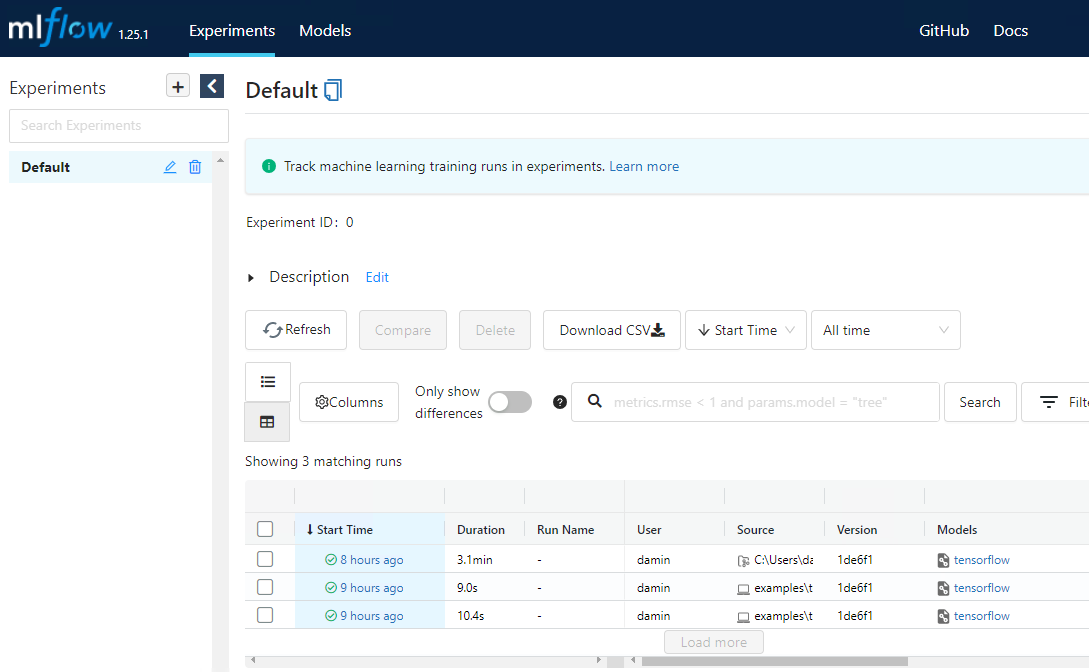

### Query models

You can query models by a filter like

```
metrics.accuracy>0.29
```

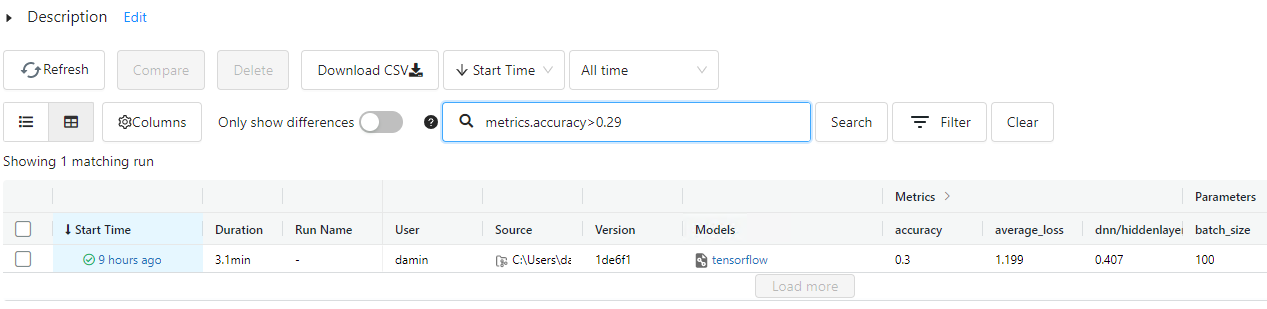

### Package your trained model



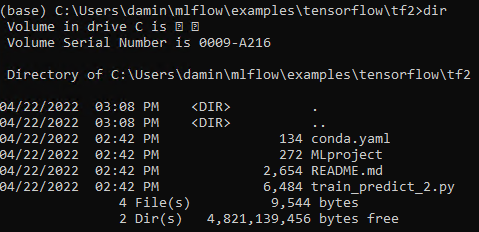


* __MLproject__ 

```yaml
name: tensorflow-example
conda_env: conda.yaml

entry_points:
  main:
    parameters:
      batch_size: {type: int, default: 100}
      train_steps: {type: int, default: 1000}
    command: "python train_predict_2.py --batch_size={batch_size} --train_steps={train_steps}"
```


* __conda.yaml__

```yaml
name: tensorflow-example
channels:
  - conda-forge
dependencies:
  - python=3.7
  - pip
  - pip:
    - mlflow
    - tensorflow==2.0.0
```


* __train_predict_2.py__

```python
# in case this is run outside of conda environment with python2
import mlflow
import argparse
import sys
from mlflow import pyfunc
import pandas as pd
import shutil
import tempfile
import tensorflow as tf
from tensorflow import estimator as tf_estimator
import mlflow.tensorflow

TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

CSV_COLUMN_NAMES = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
SPECIES = ["Setosa", "Versicolor", "Virginica"]


def load_data(y_name="Species"):
    """Returns the iris dataset as (train_x, train_y), (test_x, test_y)."""
    train_path = tf.keras.utils.get_file(TRAIN_URL.split("/")[-1], TRAIN_URL)
    test_path = tf.keras.utils.get_file(TEST_URL.split("/")[-1], TEST_URL)

    train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
    train_x, train_y = train, train.pop(y_name)

    test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
    test_x, test_y = test, test.pop(y_name)

    return (train_x, train_y), (test_x, test_y)


def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)

    # Return the dataset.
    return dataset


def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features = dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset


# Enable auto-logging to MLflow to capture TensorBoard metrics.
mlflow.tensorflow.autolog()

parser = argparse.ArgumentParser()
parser.add_argument("--batch_size", default=100, type=int, help="batch size")
parser.add_argument("--train_steps", default=1000, type=int, help="number of training steps")


def main(argv):
    with mlflow.start_run():
        args = parser.parse_args(argv[1:])

        # Fetch the data
        (train_x, train_y), (test_x, test_y) = load_data()

        # Feature columns describe how to use the input.
        my_feature_columns = []
        for key in train_x.keys():
            my_feature_columns.append(tf.feature_column.numeric_column(key=key))

        # Two hidden layers of 10 nodes each.
        hidden_units = [10, 10]

        # Build 2 hidden layer DNN with 10, 10 units respectively.
        classifier = tf_estimator.DNNClassifier(
            feature_columns=my_feature_columns,
            hidden_units=hidden_units,
            # The model must choose between 3 classes.
            n_classes=3,
        )

        # Train the Model.
        classifier.train(
            input_fn=lambda: train_input_fn(train_x, train_y, args.batch_size),
            steps=args.train_steps,
        )

        # Evaluate the model.
        eval_result = classifier.evaluate(
            input_fn=lambda: eval_input_fn(test_x, test_y, args.batch_size)
        )

        print("\nTest set accuracy: {accuracy:0.3f}\n".format(**eval_result))

        # Generate predictions from the model
        expected = ["Setosa", "Versicolor", "Virginica"]
        predict_x = {
            "SepalLength": [5.1, 5.9, 6.9],
            "SepalWidth": [3.3, 3.0, 3.1],
            "PetalLength": [1.7, 4.2, 5.4],
            "PetalWidth": [0.5, 1.5, 2.1],
        }

        predictions = classifier.predict(
            input_fn=lambda: eval_input_fn(predict_x, labels=None, batch_size=args.batch_size)
        )

        old_predictions = []
        template = '\nPrediction is "{}" ({:.1f}%), expected "{}"'

        for pred_dict, expec in zip(predictions, expected):
            class_id = pred_dict["class_ids"][0]
            probability = pred_dict["probabilities"][class_id]

            print(template.format(SPECIES[class_id], 100 * probability, expec))

            old_predictions.append(SPECIES[class_id])

        # Creating output tf.Variables to specify the output of the saved model.
        feat_specifications = {
            "SepalLength": tf.Variable([], dtype=tf.float64, name="SepalLength"),
            "SepalWidth": tf.Variable([], dtype=tf.float64, name="SepalWidth"),
            "PetalLength": tf.Variable([], dtype=tf.float64, name="PetalLength"),
            "PetalWidth": tf.Variable([], dtype=tf.float64, name="PetalWidth"),
        }

        receiver_fn = tf_estimator.export.build_raw_serving_input_receiver_fn(feat_specifications)
        temp = tempfile.mkdtemp()
        try:
            # The model is automatically logged when export_saved_model() is called.
            saved_estimator_path = classifier.export_saved_model(temp, receiver_fn).decode("utf-8")

            # Since the model was automatically logged as an artifact (more specifically
            # a MLflow Model), we don't need to use saved_estimator_path to load back the model.
            # MLflow takes care of it!
            pyfunc_model = pyfunc.load_model(mlflow.get_artifact_uri("model"))

            predict_data = [[5.1, 3.3, 1.7, 0.5], [5.9, 3.0, 4.2, 1.5], [6.9, 3.1, 5.4, 2.1]]
            df = pd.DataFrame(
                data=predict_data,
                columns=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"],
            )

            # Predicting on the loaded Python Function and a DataFrame containing the
            # original data we predicted on.
            predict_df = pyfunc_model.predict(df)

            # Checking the PyFunc's predictions are the same as the original model's predictions.
            template = '\nOriginal prediction is "{}", reloaded prediction is "{}"'
            for expec, pred in zip(old_predictions, predict_df["classes"]):
                class_id = predict_df["class_ids"][
                    predict_df.loc[predict_df["classes"] == pred].index[0]
                ]
                reloaded_label = SPECIES[class_id]
                print(template.format(expec, reloaded_label))
        finally:
            shutil.rmtree(temp)


if __name__ == "__main__":
    main(sys.argv)

```

### Run the code in a virtual conda environment with all dependencies

```
(base) C:\Users\damin\mlflow>mlflow run examples\tensorflow\tf2 -P batch_size=100 -P train_steps=1000


2022/04/22 15:06:05 INFO mlflow.utils.conda: === Creating conda environment mlflow-600aabd82d9fb5e2429f5c84fbbb6c861d7e5ea2 ===
Collecting package metadata (repodata.json): done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



Downloading and Extracting Packages
python_abi-3.7       | 4 KB      | ############################################################################ | 100%
pip-22.0.4           | 1.5 MB    | ############################################################################ | 100%
ca-certificates-2021 | 176 KB    | ############################################################################ | 100%
sqlite-3.38.2        | 1.3 MB    | ############################################################################ | 100%
ucrt-10.0.20348.0    | 1.2 MB    | ############################################################################ | 100%
setuptools-62.1.0    | 1.2 MB    | ############################################################################ | 100%
wheel-0.37.1         | 31 KB     | ############################################################################ | 100%
openssl-3.0.2        | 10.1 MB   | ############################################################################ | 100%
vs2015_runtime-14.29 | 1.3 MB    | ############################################################################ | 100%
python-3.7.12        | 18.0 MB   | ############################################################################ | 100%
vc-14.2              | 13 KB     | ############################################################################ | 100%
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Installing pip dependencies: - Ran pip subprocess with arguments:
['C:\\Users\\damin\\anaconda3\\envs\\mlflow-600aabd82d9fb5e2429f5c84fbbb6c861d7e5ea2\\python.exe', '-m', 'pip', 'install', '-U', '-r', 'C:\\Users\\damin\\mlflow\\examples\\tensorflow\\tf2\\condaenv.1arkmunx.requirements.txt']
Pip subprocess output:
Collecting mlflow
  Using cached mlflow-1.25.1-py3-none-any.whl (16.8 MB)
Collecting tensorflow==2.0.0
  Downloading tensorflow-2.0.0-cp37-cp37m-win_amd64.whl (48.1 MB)
     ---------------------------------------- 48.1/48.1 MB 5.2 MB/s eta 0:00:00
Collecting keras-applications>=1.0.8
  Downloading Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
     ---------------------------------------- 50.7/50.7 KB ? eta 0:00:00
Collecting opt-einsum>=2.3.2
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Collecting astor>=0.6.0
  Downloading astor-0.8.1-py2.py3-none-any.whl (27 kB)
Collecting absl-py>=0.7.0
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
Collecting six>=1.10.0
  Downloading six-1.16.0-py2.py3-none-any.whl (11 kB)
Collecting google-pasta>=0.1.6
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Collecting tensorboard<2.1.0,>=2.0.0
  Downloading tensorboard-2.0.2-py3-none-any.whl (3.8 MB)
     ---------------------------------------- 3.8/3.8 MB 4.3 MB/s eta 0:00:00
Collecting numpy<2.0,>=1.16.0
  Downloading numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
     ---------------------------------------- 14.0/14.0 MB 5.4 MB/s eta 0:00:00
Collecting termcolor>=1.1.0
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Collecting wrapt>=1.11.1
  Downloading wrapt-1.14.0-cp37-cp37m-win_amd64.whl (36 kB)
Collecting grpcio>=1.8.6
  Downloading grpcio-1.44.0-cp37-cp37m-win_amd64.whl (3.4 MB)
     ---------------------------------------- 3.4/3.4 MB 6.2 MB/s eta 0:00:00
Collecting keras-preprocessing>=1.0.5
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Requirement already satisfied: wheel>=0.26 in c:\users\damin\anaconda3\envs\mlflow-600aabd82d9fb5e2429f5c84fbbb6c861d7e5ea2\lib\site-packages (from tensorflow==2.0.0->-r C:\Users\damin\mlflow\examples\tensorflow\tf2\condaenv.1arkmunx.requirements.txt (line 2)) (0.37.1)
Collecting gast==0.2.2
  Downloading gast-0.2.2.tar.gz (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Collecting tensorflow-estimator<2.1.0,>=2.0.0
  Downloading tensorflow_estimator-2.0.1-py2.py3-none-any.whl (449 kB)
     -------------------------------------- 449.9/449.9 KB 5.6 MB/s eta 0:00:00
Collecting protobuf>=3.6.1
  Downloading protobuf-3.20.1-cp37-cp37m-win_amd64.whl (905 kB)
     -------------------------------------- 905.1/905.1 KB 5.7 MB/s eta 0:00:00
Collecting click>=7.0
  Downloading click-8.1.2-py3-none-any.whl (96 kB)
     ---------------------------------------- 96.6/96.6 KB 5.4 MB/s eta 0:00:00
Collecting gitpython>=2.1.0
  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
Collecting scipy
  Downloading scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)
     ---------------------------------------- 34.1/34.1 MB 6.3 MB/s eta 0:00:00
Collecting sqlparse>=0.3.1
  Using cached sqlparse-0.4.2-py3-none-any.whl (42 kB)
Collecting requests>=2.17.3
  Downloading requests-2.27.1-py2.py3-none-any.whl (63 kB)
     ---------------------------------------- 63.1/63.1 KB 3.3 MB/s eta 0:00:00
Collecting Flask
  Downloading Flask-2.1.1-py3-none-any.whl (95 kB)
     ---------------------------------------- 95.2/95.2 KB ? eta 0:00:00
Collecting docker>=4.0.0
  Using cached docker-5.0.3-py2.py3-none-any.whl (146 kB)
Collecting alembic
  Using cached alembic-1.7.7-py3-none-any.whl (210 kB)
Collecting pyyaml>=5.1
  Downloading PyYAML-6.0-cp37-cp37m-win_amd64.whl (153 kB)
     -------------------------------------- 153.2/153.2 KB 4.6 MB/s eta 0:00:00
Collecting cloudpickle
  Downloading cloudpickle-2.0.0-py3-none-any.whl (25 kB)
Collecting sqlalchemy
  Downloading SQLAlchemy-1.4.35-cp37-cp37m-win_amd64.whl (1.6 MB)
     ---------------------------------------- 1.6/1.6 MB 6.6 MB/s eta 0:00:00
Collecting pytz
  Downloading pytz-2022.1-py2.py3-none-any.whl (503 kB)
     -------------------------------------- 503.5/503.5 KB 6.3 MB/s eta 0:00:00
Collecting prometheus-flask-exporter
  Using cached prometheus_flask_exporter-0.20.1-py3-none-any.whl (18 kB)
Collecting querystring-parser
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
Collecting entrypoints
  Downloading entrypoints-0.4-py3-none-any.whl (5.3 kB)
Collecting packaging
  Downloading packaging-21.3-py3-none-any.whl (40 kB)
     ---------------------------------------- 40.8/40.8 KB ? eta 0:00:00
Collecting databricks-cli>=0.8.7
  Using cached databricks-cli-0.16.6.tar.gz (62 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Collecting waitress
  Using cached waitress-2.1.1-py3-none-any.whl (57 kB)
Collecting importlib-metadata!=4.7.0,>=3.7.0
  Downloading importlib_metadata-4.11.3-py3-none-any.whl (18 kB)
Collecting pandas
  Downloading pandas-1.3.5-cp37-cp37m-win_amd64.whl (10.0 MB)
     ---------------------------------------- 10.0/10.0 MB 6.6 MB/s eta 0:00:00
Collecting colorama
  Downloading colorama-0.4.4-py2.py3-none-any.whl (16 kB)
Collecting pyjwt>=1.7.0
  Using cached PyJWT-2.3.0-py3-none-any.whl (16 kB)
Collecting oauthlib>=3.1.0
  Downloading oauthlib-3.2.0-py3-none-any.whl (151 kB)
     -------------------------------------- 151.5/151.5 KB 4.4 MB/s eta 0:00:00
Collecting tabulate>=0.7.7
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Collecting pywin32==227
  Downloading pywin32-227-cp37-cp37m-win_amd64.whl (9.1 MB)
     ---------------------------------------- 9.1/9.1 MB 5.5 MB/s eta 0:00:00
Collecting websocket-client>=0.32.0
  Using cached websocket_client-1.3.2-py3-none-any.whl (54 kB)
Collecting gitdb<5,>=4.0.1
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
Collecting typing-extensions>=3.7.4.3
  Downloading typing_extensions-4.2.0-py3-none-any.whl (24 kB)
Collecting zipp>=0.5
  Downloading zipp-3.8.0-py3-none-any.whl (5.4 kB)
Collecting h5py
  Downloading h5py-3.6.0-cp37-cp37m-win_amd64.whl (2.8 MB)
     ---------------------------------------- 2.8/2.8 MB 6.8 MB/s eta 0:00:00
Collecting charset-normalizer~=2.0.0
  Downloading charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
Collecting urllib3<1.27,>=1.21.1
  Downloading urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
     -------------------------------------- 139.0/139.0 KB 8.6 MB/s eta 0:00:00
Collecting certifi>=2017.4.17
  Downloading certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
     -------------------------------------- 149.2/149.2 KB 9.3 MB/s eta 0:00:00
Collecting idna<4,>=2.5
  Downloading idna-3.3-py3-none-any.whl (61 kB)
     ---------------------------------------- 61.2/61.2 KB 3.2 MB/s eta 0:00:00
Collecting google-auth-oauthlib<0.5,>=0.4.1
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
Collecting google-auth<2,>=1.6.3
  Downloading google_auth-1.35.0-py2.py3-none-any.whl (152 kB)
     -------------------------------------- 152.9/152.9 KB 8.9 MB/s eta 0:00:00
Collecting werkzeug>=0.11.15
  Downloading Werkzeug-2.1.1-py3-none-any.whl (224 kB)
     -------------------------------------- 224.7/224.7 KB 4.6 MB/s eta 0:00:00
Requirement already satisfied: setuptools>=41.0.0 in c:\users\damin\anaconda3\envs\mlflow-600aabd82d9fb5e2429f5c84fbbb6c861d7e5ea2\lib\site-packages (from tensorboard<2.1.0,>=2.0.0->tensorflow==2.0.0->-r C:\Users\damin\mlflow\examples\tensorflow\tf2\condaenv.1arkmunx.requirements.txt (line 2)) (62.1.0)
Collecting markdown>=2.6.8
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
Collecting Mako
  Using cached Mako-1.2.0-py3-none-any.whl (78 kB)
Collecting importlib-resources
  Downloading importlib_resources-5.7.1-py3-none-any.whl (28 kB)
Collecting greenlet!=0.4.17
  Downloading greenlet-1.1.2-cp37-cp37m-win_amd64.whl (101 kB)
     ---------------------------------------- 101.2/101.2 KB ? eta 0:00:00
Collecting itsdangerous>=2.0
  Downloading itsdangerous-2.1.2-py3-none-any.whl (15 kB)
Collecting Jinja2>=3.0
  Downloading Jinja2-3.1.1-py3-none-any.whl (132 kB)
     -------------------------------------- 132.6/132.6 KB 3.9 MB/s eta 0:00:00
Collecting pyparsing!=3.0.5,>=2.0.2
  Downloading pyparsing-3.0.8-py3-none-any.whl (98 kB)
     ---------------------------------------- 98.5/98.5 KB 2.8 MB/s eta 0:00:00
Collecting python-dateutil>=2.7.3
  Downloading python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
     -------------------------------------- 247.7/247.7 KB 5.1 MB/s eta 0:00:00
Collecting prometheus-client
  Downloading prometheus_client-0.14.1-py3-none-any.whl (59 kB)
     ---------------------------------------- 59.5/59.5 KB ? eta 0:00:00
Collecting smmap<6,>=3.0.1
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
Collecting cachetools<5.0,>=2.0.0
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
Collecting pyasn1-modules>=0.2.1
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
Collecting rsa<5,>=3.1.4
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
Collecting requests-oauthlib>=0.7.0
  Downloading requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Collecting MarkupSafe>=2.0
  Downloading MarkupSafe-2.1.1-cp37-cp37m-win_amd64.whl (17 kB)
Collecting cached-property
  Downloading cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
Collecting pyasn1<0.5.0,>=0.4.6
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
Building wheels for collected packages: gast, databricks-cli, termcolor
  Building wheel for gast (setup.py): started
  Building wheel for gast (setup.py): finished with status 'done'
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=5daacf15e731b28e65e4a889628c1e0f62679f3fc081670c8a2bfe0aef6bf006
  Stored in directory: c:\users\damin\appdata\local\pip\cache\wheels\21\7f\02\420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
  Building wheel for databricks-cli (setup.py): started
  Building wheel for databricks-cli (setup.py): finished with status 'done'
  Created wheel for databricks-cli: filename=databricks_cli-0.16.6-py3-none-any.whl size=112626 sha256=152fa8a709041c1c6f62d52bfb5901a00ffcefc854fc3911b029126519e5a3df
  Stored in directory: c:\users\damin\appdata\local\pip\cache\wheels\96\c1\f8\d75a22e789ab6a4dff11f18338c3af4360189aa371295cc934
  Building wheel for termcolor (setup.py): started
  Building wheel for termcolor (setup.py): finished with status 'done'
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=789bd7ebf9eb0e4b3876429df770a27f09a5563d22a81848ea1cb62e3a099be5
  Stored in directory: c:\users\damin\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built gast databricks-cli termcolor
Installing collected packages: termcolor, tensorflow-estimator, tabulate, pywin32, pytz, pyasn1, certifi, cached-property, zipp, wrapt, werkzeug, websocket-client, waitress, urllib3, typing-extensions, sqlparse, smmap, six, rsa, pyyaml, pyparsing, pyjwt, pyasn1-modules, protobuf, prometheus-client, oauthlib, numpy, MarkupSafe, itsdangerous, idna, greenlet, gast, entrypoints, colorama, cloudpickle, charset-normalizer, cachetools, astor, scipy, requests, querystring-parser, python-dateutil, packaging, opt-einsum, keras-preprocessing, Jinja2, importlib-resources, importlib-metadata, h5py, grpcio, google-pasta, google-auth, gitdb, absl-py, sqlalchemy, requests-oauthlib, pandas, markdown, Mako, keras-applications, gitpython, docker, click, google-auth-oauthlib, Flask, databricks-cli, alembic, tensorboard, prometheus-flask-exporter, tensorflow, mlflow
Successfully installed Flask-2.1.1 Jinja2-3.1.1 Mako-1.2.0 MarkupSafe-2.1.1 absl-py-1.0.0 alembic-1.7.7 astor-0.8.1 cached-property-1.5.2 cachetools-4.2.4 certifi-2021.10.8 charset-normalizer-2.0.12 click-8.1.2 cloudpickle-2.0.0 colorama-0.4.4 databricks-cli-0.16.6 docker-5.0.3 entrypoints-0.4 gast-0.2.2 gitdb-4.0.9 gitpython-3.1.27 google-auth-1.35.0 google-auth-oauthlib-0.4.6 google-pasta-0.2.0 greenlet-1.1.2 grpcio-1.44.0 h5py-3.6.0 idna-3.3 importlib-metadata-4.11.3 importlib-resources-5.7.1 itsdangerous-2.1.2 keras-applications-1.0.8 keras-preprocessing-1.1.2 markdown-3.3.6 mlflow-1.25.1 numpy-1.21.6 oauthlib-3.2.0 opt-einsum-3.3.0 packaging-21.3 pandas-1.3.5 prometheus-client-0.14.1 prometheus-flask-exporter-0.20.1 protobuf-3.20.1 pyasn1-0.4.8 pyasn1-modules-0.2.8 pyjwt-2.3.0 pyparsing-3.0.8 python-dateutil-2.8.2 pytz-2022.1 pywin32-227 pyyaml-6.0 querystring-parser-1.2.4 requests-2.27.1 requests-oauthlib-1.3.1 rsa-4.8 scipy-1.7.3 six-1.16.0 smmap-5.0.0 sqlalchemy-1.4.35 sqlparse-0.4.2 tabulate-0.8.9 tensorboard-2.0.2 tensorflow-2.0.0 tensorflow-estimator-2.0.1 termcolor-1.1.0 typing-extensions-4.2.0 urllib3-1.26.9 waitress-2.1.1 websocket-client-1.3.2 werkzeug-2.1.1 wrapt-1.14.0 zipp-3.8.0

done
#
# To activate this environment, use
#
#     $ conda activate mlflow-600aabd82d9fb5e2429f5c84fbbb6c861d7e5ea2
#
# To deactivate an active environment, use
#
#     $ conda deactivate

2022/04/22 15:08:52 INFO mlflow.projects.utils: === Created directory d:\Temp\tmpbak7a8yz for downloading remote URIs passed to arguments of type 'path' ===
2022/04/22 15:08:52 INFO mlflow.projects.backend.local: === Running command 'conda activate mlflow-600aabd82d9fb5e2429f5c84fbbb6c861d7e5ea2 && python train_predict_2.py --batch_size=100 --train_steps=1000' in run with ID 'e5e2fa3f267141a7ac84b2735e9bedc8' ===
2022-04-22 15:08:57.237525: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
WARNING:tensorflow:Using temporary folder as model directory: d:\Temp\tmpiych2srf
WARNING:tensorflow:From C:\Users\damin\anaconda3\envs\mlflow-600aabd82d9fb5e2429f5c84fbbb6c861d7e5ea2\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
WARNING:tensorflow:From C:\Users\damin\anaconda3\envs\mlflow-600aabd82d9fb5e2429f5c84fbbb6c861d7e5ea2\lib\site-packages\tensorflow_core\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
WARNING:tensorflow:Layer dnn is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

WARNING:tensorflow:From C:\Users\damin\anaconda3\envs\mlflow-600aabd82d9fb5e2429f5c84fbbb6c861d7e5ea2\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\adagrad.py:108: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
WARNING:tensorflow:Layer dnn is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


Test set accuracy: 0.300


Prediction is "Setosa" (36.7%), expected "Setosa"

Prediction is "Virginica" (38.3%), expected "Versicolor"

Prediction is "Virginica" (39.9%), expected "Virginica"
2022/04/22 15:09:01 INFO mlflow.tensorflow: Logging TensorFlow Estimator as MLflow Model to run with ID 'e5e2fa3f267141a7ac84b2735e9bedc8'
WARNING:tensorflow:Layer dnn is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

WARNING:tensorflow:From C:\Users\damin\anaconda3\envs\mlflow-600aabd82d9fb5e2429f5c84fbbb6c861d7e5ea2\lib\site-packages\tensorflow_core\python\saved_model\signature_def_utils_impl.py:201: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
WARNING:tensorflow:Export includes no default signature!
2022/04/22 15:09:02 INFO mlflow.tensorflow: Validating the specified TensorFlow model by attempting to load it in a new TensorFlow graph...
2022/04/22 15:09:02 INFO mlflow.tensorflow: Validation succeeded!
2022/04/22 15:09:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\damin\anaconda3\envs\mlflow-600aabd82d9fb5e2429f5c84fbbb6c861d7e5ea2\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils."

Original prediction is "Setosa", reloaded prediction is "Setosa"

Original prediction is "Virginica", reloaded prediction is "Virginica"

Original prediction is "Virginica", reloaded prediction is "Virginica"
2022/04/22 15:09:08 INFO mlflow.projects: === Run (ID 'e5e2fa3f267141a7ac84b2735e9bedc8') succeeded ===
```

In [3]:
import mlflow
logged_model = 'file:///C:/Users/damin/mlflow/mlruns/0/e5e2fa3f267141a7ac84b2735e9bedc8/artifacts/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

2022/04/23 00:33:05 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - pandas (current: 1.0.5, required: pandas==1.3.5)
 - pyyaml (current: 5.3.1, required: pyyaml==6.0)
 - scipy (current: 1.5.0, required: scipy==1.7.3)
 - tensorflow (current: 2.7.0, required: tensorflow==2.0.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2022/04/23 00:33:05 WARNING mlflow.pyfunc: The version of Python that the model was saved in, `Python 3.7.12`, differs from the version of Python that is currently running, `Python 3.8.3`, and may be incompatible


In [4]:
# Predict on a Pandas DataFrame.
import pandas as pd

predict_x = {"SepalLength": [5.1, 5.9, 6.9,5.1, 5.9, 6.9],
             "SepalWidth": [3.3, 3.0, 3.1, 3.3, 3.0, 3.1],            
             "PetalLength": [1.7, 4.2, 5.4, 1.7, 4.2, 5.4],            
             "PetalWidth": [0.5, 1.5, 2.1, 0.5, 1.5, 2.1],}
x=pd.DataFrame(predict_x)
pred_y=loaded_model.predict(x)
pred_y

,logits,all_class_ids,classes,class_ids,all_classes,probabilities
0,"[0.28948166966438293, -0.022144131362438202, 0...","[0, 1, 2]",b'0',0,"[b'0', b'1', b'2']","[0.36661750078201294, 0.26845768094062805, 0.3..."
1,"[0.31172987818717957, -0.11090188473463058, 0....","[0, 1, 2]",b'2',2,"[b'0', b'1', b'2']","[0.3725920021533966, 0.24416697025299072, 0.38..."
2,"[0.46621203422546387, -0.17926913499832153, 0....","[0, 1, 2]",b'2',2,"[b'0', b'1', b'2']","[0.3942307233810425, 0.20673856139183044, 0.39..."
3,"[0.28948166966438293, -0.022144131362438202, 0...","[0, 1, 2]",b'0',0,"[b'0', b'1', b'2']","[0.36661750078201294, 0.26845768094062805, 0.3..."
4,"[0.31172987818717957, -0.11090188473463058, 0....","[0, 1, 2]",b'2',2,"[b'0', b'1', b'2']","[0.3725920021533966, 0.24416697025299072, 0.38..."
5,"[0.46621203422546387, -0.17926913499832153, 0....","[0, 1, 2]",b'2',2,"[b'0', b'1', b'2']","[0.3942307233810425, 0.20673859119415283, 0.39..."


In [17]:
x.to_json(orient='split')

'{"columns":["SepalLength","SepalWidth","PetalLength","PetalWidth"],"index":[0,1,2,3,4,5],"data":[[5.1,3.3,1.7,0.5],[5.9,3.0,4.2,1.5],[6.9,3.1,5.4,2.1],[5.1,3.3,1.7,0.5],[5.9,3.0,4.2,1.5],[6.9,3.1,5.4,2.1]]}'

### Deploy to microservice

```
(base) C:\Users\damin\mlflow>mlflow models serve -m ./mlruns/0/e5e2fa3f267141a7ac84b2735e9bedc8/artifacts/model -p 1234


2022/04/22 22:23:31 INFO mlflow.models.cli: Selected backend for flavor 'python_function'
2022/04/22 22:23:32 INFO mlflow.utils.conda: === Creating conda environment mlflow-01bc9f41a2df2402d31533a42251349b061b87ec ===
Collecting package metadata (repodata.json): done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Installing pip dependencies: \ Ran pip subprocess with arguments:
['C:\\Users\\damin\\anaconda3\\envs\\mlflow-01bc9f41a2df2402d31533a42251349b061b87ec\\python.exe', '-m', 'pip', 'install', '-U', '-r', 'C:\\Users\\damin\\mlflow\\mlruns\\0\\e5e2fa3f267141a7ac84b2735e9bedc8\\artifacts\\model\\condaenv.rx61elzn.requirements.txt']
Pip subprocess output:
Collecting mlflow
  Using cached mlflow-1.25.1-py3-none-any.whl (16.8 MB)
Collecting pandas==1.3.5
  Using cached pandas-1.3.5-cp37-cp37m-win_amd64.whl (10.0 MB)
Collecting pyyaml==6.0
  Using cached PyYAML-6.0-cp37-cp37m-win_amd64.whl (153 kB)
Collecting scipy==1.7.3
  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)
Collecting tensorflow==2.0.0
  Using cached tensorflow-2.0.0-cp37-cp37m-win_amd64.whl (48.1 MB)
Collecting numpy>=1.17.3
  Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
Collecting python-dateutil>=2.7.3
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
Collecting pytz>=2017.3
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
Collecting protobuf>=3.6.1
  Using cached protobuf-3.20.1-cp37-cp37m-win_amd64.whl (905 kB)
Collecting astor>=0.6.0
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
Collecting keras-preprocessing>=1.0.5
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Collecting tensorboard<2.1.0,>=2.0.0
  Using cached tensorboard-2.0.2-py3-none-any.whl (3.8 MB)
Collecting grpcio>=1.8.6
  Using cached grpcio-1.44.0-cp37-cp37m-win_amd64.whl (3.4 MB)
Collecting six>=1.10.0
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
Collecting termcolor>=1.1.0
  Using cached termcolor-1.1.0-py3-none-any.whl
Collecting keras-applications>=1.0.8
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
Collecting wrapt>=1.11.1
  Using cached wrapt-1.14.0-cp37-cp37m-win_amd64.whl (36 kB)
Requirement already satisfied: wheel>=0.26 in c:\users\damin\anaconda3\envs\mlflow-01bc9f41a2df2402d31533a42251349b061b87ec\lib\site-packages (from tensorflow==2.0.0->-r C:\Users\damin\mlflow\mlruns\0\e5e2fa3f267141a7ac84b2735e9bedc8\artifacts\model\condaenv.rx61elzn.requirements.txt (line 5)) (0.37.1)
Collecting absl-py>=0.7.0
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
Collecting opt-einsum>=2.3.2
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Collecting gast==0.2.2
  Using cached gast-0.2.2-py3-none-any.whl
Collecting tensorflow-estimator<2.1.0,>=2.0.0
  Using cached tensorflow_estimator-2.0.1-py2.py3-none-any.whl (449 kB)
Collecting google-pasta>=0.1.6
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Collecting databricks-cli>=0.8.7
  Using cached databricks_cli-0.16.6-py3-none-any.whl
Collecting packaging
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
Collecting entrypoints
  Using cached entrypoints-0.4-py3-none-any.whl (5.3 kB)
Collecting Flask
  Using cached Flask-2.1.1-py3-none-any.whl (95 kB)
Collecting waitress
  Using cached waitress-2.1.1-py3-none-any.whl (57 kB)
Collecting querystring-parser
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
Collecting sqlalchemy
  Using cached SQLAlchemy-1.4.35-cp37-cp37m-win_amd64.whl (1.6 MB)
Collecting requests>=2.17.3
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
Collecting alembic
  Using cached alembic-1.7.7-py3-none-any.whl (210 kB)
Collecting cloudpickle
  Using cached cloudpickle-2.0.0-py3-none-any.whl (25 kB)
Collecting prometheus-flask-exporter
  Using cached prometheus_flask_exporter-0.20.1-py3-none-any.whl (18 kB)
Collecting click>=7.0
  Using cached click-8.1.2-py3-none-any.whl (96 kB)
Collecting sqlparse>=0.3.1
  Using cached sqlparse-0.4.2-py3-none-any.whl (42 kB)
Collecting gitpython>=2.1.0
  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
Collecting importlib-metadata!=4.7.0,>=3.7.0
  Using cached importlib_metadata-4.11.3-py3-none-any.whl (18 kB)
Collecting docker>=4.0.0
  Using cached docker-5.0.3-py2.py3-none-any.whl (146 kB)
Collecting colorama
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
Collecting pyjwt>=1.7.0
  Using cached PyJWT-2.3.0-py3-none-any.whl (16 kB)
Collecting oauthlib>=3.1.0
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
Collecting tabulate>=0.7.7
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Collecting websocket-client>=0.32.0
  Using cached websocket_client-1.3.2-py3-none-any.whl (54 kB)
Collecting pywin32==227
  Using cached pywin32-227-cp37-cp37m-win_amd64.whl (9.1 MB)
Collecting typing-extensions>=3.7.4.3
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
Collecting gitdb<5,>=4.0.1
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
Collecting zipp>=0.5
  Using cached zipp-3.8.0-py3-none-any.whl (5.4 kB)
Collecting h5py
  Using cached h5py-3.6.0-cp37-cp37m-win_amd64.whl (2.8 MB)
Collecting charset-normalizer~=2.0.0
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
Collecting certifi>=2017.4.17
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
Collecting urllib3<1.27,>=1.21.1
  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
Collecting idna<4,>=2.5
  Using cached idna-3.3-py3-none-any.whl (61 kB)
Collecting google-auth<2,>=1.6.3
  Using cached google_auth-1.35.0-py2.py3-none-any.whl (152 kB)
Collecting werkzeug>=0.11.15
  Using cached Werkzeug-2.1.1-py3-none-any.whl (224 kB)
Collecting markdown>=2.6.8
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
Collecting google-auth-oauthlib<0.5,>=0.4.1
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
Requirement already satisfied: setuptools>=41.0.0 in c:\users\damin\anaconda3\envs\mlflow-01bc9f41a2df2402d31533a42251349b061b87ec\lib\site-packages (from tensorboard<2.1.0,>=2.0.0->tensorflow==2.0.0->-r C:\Users\damin\mlflow\mlruns\0\e5e2fa3f267141a7ac84b2735e9bedc8\artifacts\model\condaenv.rx61elzn.requirements.txt (line 5)) (62.1.0)
Collecting importlib-resources
  Using cached importlib_resources-5.7.1-py3-none-any.whl (28 kB)
Collecting Mako
  Using cached Mako-1.2.0-py3-none-any.whl (78 kB)
Collecting greenlet!=0.4.17
  Using cached greenlet-1.1.2-cp37-cp37m-win_amd64.whl (101 kB)
Collecting Jinja2>=3.0
  Using cached Jinja2-3.1.1-py3-none-any.whl (132 kB)
Collecting itsdangerous>=2.0
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
Collecting pyparsing!=3.0.5,>=2.0.2
  Using cached pyparsing-3.0.8-py3-none-any.whl (98 kB)
Collecting prometheus-client
  Using cached prometheus_client-0.14.1-py3-none-any.whl (59 kB)
Collecting smmap<6,>=3.0.1
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
Collecting cachetools<5.0,>=2.0.0
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
Collecting rsa<5,>=3.1.4
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
Collecting pyasn1-modules>=0.2.1
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
Collecting requests-oauthlib>=0.7.0
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Collecting MarkupSafe>=2.0
  Using cached MarkupSafe-2.1.1-cp37-cp37m-win_amd64.whl (17 kB)
Collecting cached-property
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
Collecting pyasn1<0.5.0,>=0.4.6
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
Installing collected packages: termcolor, tensorflow-estimator, tabulate, pywin32, pytz, pyasn1, certifi, cached-property, zipp, wrapt, werkzeug, websocket-client, waitress, urllib3, typing-extensions, sqlparse, smmap, six, rsa, pyyaml, pyparsing, pyjwt, pyasn1-modules, protobuf, prometheus-client, oauthlib, numpy, MarkupSafe, itsdangerous, idna, greenlet, gast, entrypoints, colorama, cloudpickle, charset-normalizer, cachetools, astor, scipy, requests, querystring-parser, python-dateutil, packaging, opt-einsum, keras-preprocessing, Jinja2, importlib-resources, importlib-metadata, h5py, grpcio, google-pasta, google-auth, gitdb, absl-py, sqlalchemy, requests-oauthlib, pandas, markdown, Mako, keras-applications, gitpython, docker, click, google-auth-oauthlib, Flask, databricks-cli, alembic, tensorboard, prometheus-flask-exporter, tensorflow, mlflow
Successfully installed Flask-2.1.1 Jinja2-3.1.1 Mako-1.2.0 MarkupSafe-2.1.1 absl-py-1.0.0 alembic-1.7.7 astor-0.8.1 cached-property-1.5.2 cachetools-4.2.4 certifi-2021.10.8 charset-normalizer-2.0.12 click-8.1.2 cloudpickle-2.0.0 colorama-0.4.4 databricks-cli-0.16.6 docker-5.0.3 entrypoints-0.4 gast-0.2.2 gitdb-4.0.9 gitpython-3.1.27 google-auth-1.35.0 google-auth-oauthlib-0.4.6 google-pasta-0.2.0 greenlet-1.1.2 grpcio-1.44.0 h5py-3.6.0 idna-3.3 importlib-metadata-4.11.3 importlib-resources-5.7.1 itsdangerous-2.1.2 keras-applications-1.0.8 keras-preprocessing-1.1.2 markdown-3.3.6 mlflow-1.25.1 numpy-1.21.6 oauthlib-3.2.0 opt-einsum-3.3.0 packaging-21.3 pandas-1.3.5 prometheus-client-0.14.1 prometheus-flask-exporter-0.20.1 protobuf-3.20.1 pyasn1-0.4.8 pyasn1-modules-0.2.8 pyjwt-2.3.0 pyparsing-3.0.8 python-dateutil-2.8.2 pytz-2022.1 pywin32-227 pyyaml-6.0 querystring-parser-1.2.4 requests-2.27.1 requests-oauthlib-1.3.1 rsa-4.8 scipy-1.7.3 six-1.16.0 smmap-5.0.0 sqlalchemy-1.4.35 sqlparse-0.4.2 tabulate-0.8.9 tensorboard-2.0.2 tensorflow-2.0.0 tensorflow-estimator-2.0.1 termcolor-1.1.0 typing-extensions-4.2.0 urllib3-1.26.9 waitress-2.1.1 websocket-client-1.3.2 werkzeug-2.1.1 wrapt-1.14.0 zipp-3.8.0

done
#
# To activate this environment, use
#
#     $ conda activate mlflow-01bc9f41a2df2402d31533a42251349b061b87ec
#
# To deactivate an active environment, use
#
#     $ conda deactivate

2022/04/22 22:25:17 INFO mlflow.pyfunc.backend: === Running command 'conda activate mlflow-01bc9f41a2df2402d31533a42251349b061b87ec & waitress-serve --host=127.0.0.1 --port=1234 --ident=mlflow mlflow.pyfunc.scoring_server.wsgi:app'
2022-04-22 22:25:23.105344: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
WARNING:tensorflow:From C:\Users\damin\anaconda3\envs\mlflow-01bc9f41a2df2402d31533a42251349b061b87ec\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:waitress:Serving on http://127.0.0.1:1234
```

### Call the REST api 

***Notes***

* If you run the curl command in windows command prompt, command prompt throws error if the data is passed that way in curl. The correct way is to replace single quotes with double quotes and escape all the double quotes in the data like in the below way.

If you are on linux/unix, use

```
curl -X POST -H "Content-Type:application/json; format=pandas-split" --data '{"columns":["SepalLength","SepalWidth","PetalLength","PetalWidth"],"index":[0,1,2,3,4,5],"data":[[5.1,3.3,1.7,0.5],[5.9,3.0,4.2,1.5],[6.9,3.1,5.4,2.1],[5.1,3.3,1.7,0.5],[5.9,3.0,4.2,1.5],[6.9,3.1,5.4,2.1]]}' http://127.0.0.1:1234/invocations
```

If you are on windows, use

```
(base) C:\Users\damin>curl -X POST -H "Content-Type:application/json; format=pandas-split" --data "{\"columns\":[\"SepalLength\",\"SepalWidth\",\"PetalLength\",\"PetalWidth\"],\"index\":[0,1,2,3,4,5],\"data\":[[5.1,3.3,1.7,0.5],[5.9,3.0,4.2,1.5],[6.9,3.1,5.4,2.1],[5.1,3.3,1.7,0.5],[5.9,3.0,4.2,1.5],[6.9,3.1,5.4,2.1]]}" http://127.0.0.1:1234/invocations


[{"class_ids": 0, "probabilities": [0.36661750078201294, 0.26845765113830566, 0.364924818277359], "logits": [0.2894816994667053, -0.022144190967082977, 0.2848539650440216], "all_class_ids": [0, 1, 2], "all_classes": ["MA==\n", "MQ==\n", "Mg==\n"], "classes": "MA==\n"}, {"class_ids": 2, "probabilities": [0.372592031955719, 0.24416694045066833, 0.38324105739593506], "logits": [0.31172987818717957, -0.11090197414159775, 0.33991000056266785], "all_class_ids": [0, 1, 2], "all_classes": ["MA==\n", "MQ==\n", "Mg==\n"], "classes": "Mg==\n"}, {"class_ids": 2, "probabilities": [0.3942307233810425, 0.20673859119415283, 0.3990306854248047], "logits": [0.46621203422546387, -0.17926913499832153, 0.47831404209136963], "all_class_ids": [0, 1, 2], "all_classes": ["MA==\n", "MQ==\n", "Mg==\n"], "classes": "Mg==\n"}, {"class_ids": 0, "probabilities": [0.36661750078201294, 0.26845765113830566, 0.364924818277359], "logits": [0.2894816994667053, -0.022144190967082977, 0.2848539650440216], "all_class_ids": [0, 1, 2], "all_classes": ["MA==\n", "MQ==\n", "Mg==\n"], "classes": "MA==\n"}, {"class_ids": 2, "probabilities": [0.372592031955719, 0.24416694045066833, 0.38324105739593506], "logits": [0.31172987818717957, -0.11090197414159775, 0.33991000056266785], "all_class_ids": [0, 1, 2], "all_classes": ["MA==\n", "MQ==\n", "Mg==\n"], "classes": "Mg==\n"}, {"class_ids": 2, "probabilities": [0.3942307233810425, 0.20673859119415283, 0.3990306854248047], "logits": [0.46621203422546387, -0.17926913499832153, 0.47831404209136963], "all_class_ids": [0, 1, 2], "all_classes": ["MA==\n", "MQ==\n", "Mg==\n"], "classes": "Mg==\n"}]
```

### Another example: predicts the quality of wine using sklearn.linear_model.ElasticNet

```
(base) C:\Users\damin\mlflow>python examples\sklearn_elasticnet_wine\train.py

Elasticnet model (alpha=0.500000, l1_ratio=0.500000):
  RMSE: 0.7931640229276851
  MAE: 0.6271946374319586
  R2: 0.10862644997792614
```

### Try custom hyperparameters

```
(base) C:\Users\damin\mlflow>python examples\sklearn_elasticnet_wine\train.py 0.3
Elasticnet model (alpha=0.300000, l1_ratio=0.500000):
  RMSE: 0.7573787958793151
  MAE: 0.5893143148791096
  R2: 0.18724431943947983

(base) C:\Users\damin\mlflow>python examples\sklearn_elasticnet_wine\train.py 0.3 0.4
Elasticnet model (alpha=0.300000, l1_ratio=0.400000):
  RMSE: 0.7501603725852
  MAE: 0.5818749078280213
  R2: 0.2026629101382652
```

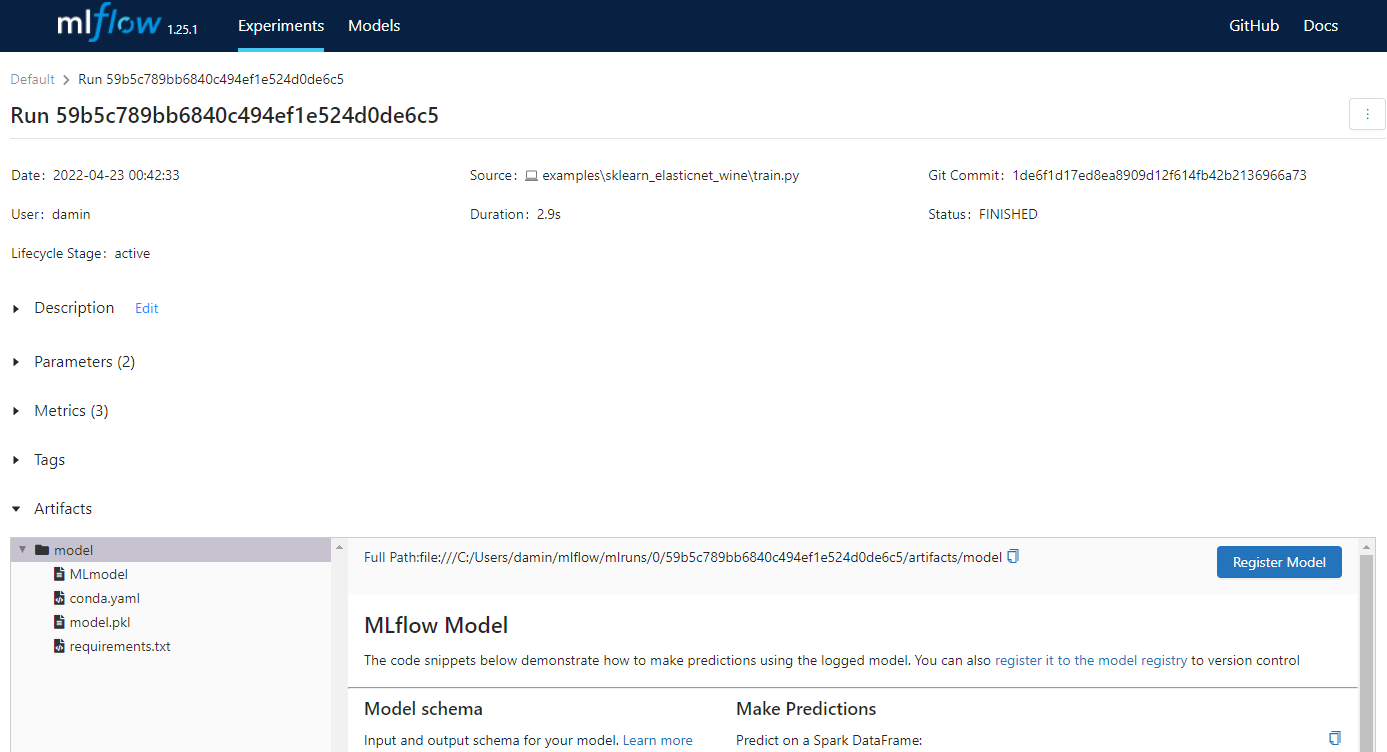

### Deploy as a microservice

```
(base) C:\Users\damin\mlflow>mlflow models serve -m .\mlruns\0\59b5c789bb6840c494ef1e524d0de6c5\artifacts\model -p 2222


2022/04/23 00:48:14 INFO mlflow.models.cli: Selected backend for flavor 'python_function'
2022/04/23 00:48:16 INFO mlflow.utils.conda: === Creating conda environment mlflow-701a31df0bb01a8bcdeeed29622827abfa2daf24 ===
Collecting package metadata (repodata.json): done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



Downloading and Extracting Packages
openssl-1.1.1n       | 5.7 MB    | ############################################################################ | 100%
setuptools-62.1.0    | 1.3 MB    | ############################################################################ | 100%
pip-20.1.1           | 1.1 MB    | ############################################################################ | 100%
python_abi-3.8       | 4 KB      | ############################################################################ | 100%
python-3.8.3         | 18.9 MB   | ############################################################################ | 100%
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Installing pip dependencies: \ Ran pip subprocess with arguments:
['C:\\Users\\damin\\anaconda3\\envs\\mlflow-701a31df0bb01a8bcdeeed29622827abfa2daf24\\python.exe', '-m', 'pip', 'install', '-U', '-r', 'C:\\Users\\damin\\mlflow\\mlruns\\0\\59b5c789bb6840c494ef1e524d0de6c5\\artifacts\\model\\condaenv.svyfumiy.requirements.txt']
Pip subprocess output:
Collecting mlflow
  Using cached mlflow-1.25.1-py3-none-any.whl (16.8 MB)
Collecting cloudpickle==1.5.0
  Downloading cloudpickle-1.5.0-py3-none-any.whl (22 kB)
Collecting psutil==5.7.0
  Downloading psutil-5.7.0-cp38-cp38-win_amd64.whl (235 kB)
Collecting scikit-learn==0.23.1
  Downloading scikit_learn-0.23.1-cp38-cp38-win_amd64.whl (6.8 MB)
Collecting typing-extensions==3.7.4.2
  Downloading typing_extensions-3.7.4.2-py3-none-any.whl (22 kB)
Collecting sqlalchemy
  Downloading SQLAlchemy-1.4.35-cp38-cp38-win_amd64.whl (1.6 MB)
Collecting numpy
  Downloading numpy-1.22.3-cp38-cp38-win_amd64.whl (14.7 MB)
Collecting docker>=4.0.0
  Using cached docker-5.0.3-py2.py3-none-any.whl (146 kB)
Collecting pyyaml>=5.1
  Downloading PyYAML-6.0-cp38-cp38-win_amd64.whl (155 kB)
Collecting importlib-metadata!=4.7.0,>=3.7.0
  Using cached importlib_metadata-4.11.3-py3-none-any.whl (18 kB)
Collecting gitpython>=2.1.0
  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
Collecting click>=7.0
  Using cached click-8.1.2-py3-none-any.whl (96 kB)
Collecting alembic
  Using cached alembic-1.7.7-py3-none-any.whl (210 kB)
Collecting pytz
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
Collecting protobuf>=3.7.0
  Downloading protobuf-3.20.1-cp38-cp38-win_amd64.whl (904 kB)
Collecting prometheus-flask-exporter
  Using cached prometheus_flask_exporter-0.20.1-py3-none-any.whl (18 kB)
Collecting sqlparse>=0.3.1
  Using cached sqlparse-0.4.2-py3-none-any.whl (42 kB)
Collecting requests>=2.17.3
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
Collecting pandas
  Downloading pandas-1.4.2-cp38-cp38-win_amd64.whl (10.6 MB)
Collecting entrypoints
  Using cached entrypoints-0.4-py3-none-any.whl (5.3 kB)
Collecting querystring-parser
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
Collecting waitress; platform_system == "Windows"
  Using cached waitress-2.1.1-py3-none-any.whl (57 kB)
Processing c:\users\damin\appdata\local\pip\cache\wheels\76\3a\2f\8a3d92bc72a413217b5c8649e2044d7161cacbe06e014361a3\databricks_cli-0.16.6-py3-none-any.whl
Collecting packaging
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
Collecting Flask
  Using cached Flask-2.1.1-py3-none-any.whl (95 kB)
Collecting scipy
  Downloading scipy-1.8.0-cp38-cp38-win_amd64.whl (36.9 MB)
Collecting joblib>=0.11
  Downloading joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Collecting threadpoolctl>=2.0.0
  Downloading threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Collecting greenlet!=0.4.17; python_version >= "3" and (platform_machine == "aarch64" or (platform_machine == "ppc64le" or (platform_machine == "x86_64" or (platform_machine == "amd64" or (platform_machine == "AMD64" or (platform_machine == "win32" or platform_machine == "WIN32"))))))
  Downloading greenlet-1.1.2-cp38-cp38-win_amd64.whl (101 kB)
Collecting pywin32==227; sys_platform == "win32"
  Downloading pywin32-227-cp38-cp38-win_amd64.whl (9.1 MB)
Collecting websocket-client>=0.32.0
  Using cached websocket_client-1.3.2-py3-none-any.whl (54 kB)
Collecting zipp>=0.5
  Using cached zipp-3.8.0-py3-none-any.whl (5.4 kB)
Collecting gitdb<5,>=4.0.1
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
Collecting colorama; platform_system == "Windows"
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
Collecting importlib-resources; python_version < "3.9"
  Using cached importlib_resources-5.7.1-py3-none-any.whl (28 kB)
Collecting Mako
  Using cached Mako-1.2.0-py3-none-any.whl (78 kB)
Collecting prometheus-client
  Using cached prometheus_client-0.14.1-py3-none-any.whl (59 kB)
Collecting charset-normalizer~=2.0.0; python_version >= "3"
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
Collecting idna<4,>=2.5; python_version >= "3"
  Using cached idna-3.3-py3-none-any.whl (61 kB)
Collecting urllib3<1.27,>=1.21.1
  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
Collecting certifi>=2017.4.17
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
Collecting python-dateutil>=2.8.1
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
Collecting six
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
Collecting pyjwt>=1.7.0
  Using cached PyJWT-2.3.0-py3-none-any.whl (16 kB)
Collecting tabulate>=0.7.7
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Collecting oauthlib>=3.1.0
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
Collecting pyparsing!=3.0.5,>=2.0.2
  Using cached pyparsing-3.0.8-py3-none-any.whl (98 kB)
Collecting itsdangerous>=2.0
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
Collecting Werkzeug>=2.0
  Using cached Werkzeug-2.1.1-py3-none-any.whl (224 kB)
Collecting Jinja2>=3.0
  Using cached Jinja2-3.1.1-py3-none-any.whl (132 kB)
Collecting smmap<6,>=3.0.1
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
Collecting MarkupSafe>=0.9.2
  Downloading MarkupSafe-2.1.1-cp38-cp38-win_amd64.whl (17 kB)
Installing collected packages: greenlet, sqlalchemy, numpy, charset-normalizer, idna, urllib3, certifi, requests, pywin32, websocket-client, docker, pyyaml, zipp, importlib-metadata, cloudpickle, smmap, gitdb, gitpython, colorama, click, importlib-resources, MarkupSafe, Mako, alembic, pytz, protobuf, itsdangerous, Werkzeug, Jinja2, Flask, prometheus-client, prometheus-flask-exporter, sqlparse, six, python-dateutil, pandas, entrypoints, querystring-parser, waitress, pyjwt, tabulate, oauthlib, databricks-cli, pyparsing, packaging, scipy, mlflow, psutil, joblib, threadpoolctl, scikit-learn, typing-extensions
Successfully installed Flask-2.1.1 Jinja2-3.1.1 Mako-1.2.0 MarkupSafe-2.1.1 Werkzeug-2.1.1 alembic-1.7.7 certifi-2021.10.8 charset-normalizer-2.0.12 click-8.1.2 cloudpickle-1.5.0 colorama-0.4.4 databricks-cli-0.16.6 docker-5.0.3 entrypoints-0.4 gitdb-4.0.9 gitpython-3.1.27 greenlet-1.1.2 idna-3.3 importlib-metadata-4.11.3 importlib-resources-5.7.1 itsdangerous-2.1.2 joblib-1.1.0 mlflow-1.25.1 numpy-1.22.3 oauthlib-3.2.0 packaging-21.3 pandas-1.4.2 prometheus-client-0.14.1 prometheus-flask-exporter-0.20.1 protobuf-3.20.1 psutil-5.7.0 pyjwt-2.3.0 pyparsing-3.0.8 python-dateutil-2.8.2 pytz-2022.1 pywin32-227 pyyaml-6.0 querystring-parser-1.2.4 requests-2.27.1 scikit-learn-0.23.1 scipy-1.8.0 six-1.16.0 smmap-5.0.0 sqlalchemy-1.4.35 sqlparse-0.4.2 tabulate-0.8.9 threadpoolctl-3.1.0 typing-extensions-3.7.4.2 urllib3-1.26.9 waitress-2.1.1 websocket-client-1.3.2 zipp-3.8.0

done
#
# To activate this environment, use
#
#     $ conda activate mlflow-701a31df0bb01a8bcdeeed29622827abfa2daf24
#
# To deactivate an active environment, use
#
#     $ conda deactivate

2022/04/23 00:51:29 INFO mlflow.pyfunc.backend: === Running command 'conda activate mlflow-701a31df0bb01a8bcdeeed29622827abfa2daf24 & waitress-serve --host=127.0.0.1 --port=2222 --ident=mlflow mlflow.pyfunc.scoring_server.wsgi:app'
INFO:waitress:Serving on http://127.0.0.1:2222
```

### Call REST api


```
curl -X POST -H "Content-Type:application/json; format=pandas-split" --data "{\"columns\":[\"alcohol\", \"chlorides\", \"citric acid\", \"density\", \"fixed acidity\", \"free sulfur dioxide\", \"pH\", \"residual sugar\", \"sulphates\", \"total sulfur dioxide\", \"volatile acidity\"],\"data\":[[12.8, 0.029, 0.48, 0.98, 6.2, 29, 3.33, 1.2, 0.39, 75, 0.66]]}" http://127.0.0.1:2222/invocations
```


```
(base) C:\Users\damin>curl -X POST -H "Content-Type:application/json; format=pandas-split" --data "{\"columns\":[\"alcohol\", \"chlorides\", \"citric acid\", \"density\", \"fixed acidity\", \"free sulfur dioxide\", \"pH\", \"residual sugar\", \"sulphates\", \"total sulfur dioxide\", \"volatile acidity\"],\"data\":[[12.8, 0.029, 0.48, 0.98, 6.2, 29, 3.33, 1.2, 0.39, 75, 0.66]]}" http://127.0.0.1:2222/invocations

[4.141577607721676]
```

### Python and REST APIs: Interacting With Web Services

In [19]:
import requests
api_url = "http://127.0.0.1:1234/invocations"
todo = {"columns":["SepalLength","SepalWidth","PetalLength","PetalWidth"],"index":[0,1,2,3,4,5],"data":[[5.1,3.3,1.7,0.5],[5.9,3.0,4.2,1.5],[6.9,3.1,5.4,2.1],[5.1,3.3,1.7,0.5],[5.9,3.0,4.2,1.5],[6.9,3.1,5.4,2.1]]}
response = requests.post(api_url, json=todo)
response.json()

[{'class_ids': 0,
  'probabilities': [0.36661750078201294,
   0.26845765113830566,
   0.364924818277359],
  'logits': [0.2894816994667053, -0.022144190967082977, 0.2848539650440216],
  'all_class_ids': [0, 1, 2],
  'all_classes': ['MA==\n', 'MQ==\n', 'Mg==\n'],
  'classes': 'MA==\n'},
 {'class_ids': 2,
  'probabilities': [0.372592031955719,
   0.24416694045066833,
   0.38324105739593506],
  'logits': [0.31172987818717957, -0.11090197414159775, 0.33991000056266785],
  'all_class_ids': [0, 1, 2],
  'all_classes': ['MA==\n', 'MQ==\n', 'Mg==\n'],
  'classes': 'Mg==\n'},
 {'class_ids': 2,
  'probabilities': [0.3942307233810425,
   0.20673859119415283,
   0.3990306854248047],
  'logits': [0.46621203422546387, -0.17926913499832153, 0.47831404209136963],
  'all_class_ids': [0, 1, 2],
  'all_classes': ['MA==\n', 'MQ==\n', 'Mg==\n'],
  'classes': 'Mg==\n'},
 {'class_ids': 0,
  'probabilities': [0.36661750078201294,
   0.26845765113830566,
   0.364924818277359],
  'logits': [0.2894816994667053, -